In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import (
    AutoTokenizer,
    AutoModel,
    set_seed,
    AutoModelForMaskedLM,
    AutoModelForCausalLM,
    pipeline
)

from IPython.display import display


In [ ]:
# Import the tokenizer for the BERT model - we will use this to convert sentences into tokens that the model can understand
# BERT model - encoder - bidirectional - trained on Masked language modeling (MLM) and next sentence prediction (NSP) tasks

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


In [27]:
sentences = ["The quick Brown fox jumps over the Lazy dog.", 
            "The quick Brown fox jumps over the Lazy dog.!", 
            "Transformers are amazing for NLP tasks , 768!", 
            " Natural language processing is an entrancing field of study.", 
            "Every time you load a model, it checks whether the cached model is up-to-date. If it’s the same, then the local model is loaded. If it’s not, then the model is downloaded from the Hugging Face Hub and stored in the cache."]

results = []

for s in sentences:
    tokens = tokenizer.tokenize(s)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    
    results.append({
        "Sentence": s,
        "Character Length": len(s),
        "Token Count": len(tokens),
        "Tokens": tokens ,
        "Observed Token IDs": token_ids 
    
    })

df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
df

,Sentence,Character Length,Token Count,Tokens,Observed Token IDs
0,The quick Brown fox jumps over the Lazy dog.,44,10,"[the, quick, brown, fox, jumps, over, the, lazy, dog, .]","[1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 1012]"
1,The quick Brown fox jumps over the Lazy dog.!,45,11,"[the, quick, brown, fox, jumps, over, the, lazy, dog, ., !]","[1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 1012, 999]"
2,"Transformers are amazing for NLP tasks , 768!",45,11,"[transformers, are, amazing, for, nl, ##p, tasks, ,, 76, ##8, !]","[19081, 2024, 6429, 2005, 17953, 2361, 8518, 1010, 6146, 2620, 999]"
3,Natural language processing is an entrancing field of study.,61,13,"[natural, language, processing, is, an, en, ##tra, ##nc, ##ing, field, of, study, .]","[3019, 2653, 6364, 2003, 2019, 4372, 6494, 12273, 2075, 2492, 1997, 2817, 1012]"
4,"Every time you load a model, it checks whether the cached model is up-to-date. If it’s the same, then the local model is loaded. If it’s not, then the model is downloaded from the Hugging Face Hub and stored in the cache.",221,57,"[every, time, you, load, a, model, ,, it, checks, whether, the, cache, ##d, model, is, up, -, to, -, date, ., if, it, ’, s, the, same, ,, then, the, local, model, is, loaded, ., if, it, ’, s, not, ,, then, the, model, is, downloaded, from, the, hugging, face, hub, and, stored, in, the, cache, .]","[2296, 2051, 2017, 7170, 1037, 2944, 1010, 2009, 14148, 3251, 1996, 17053, 2094, 2944, 2003, 2039, 1011, 2000, 1011, 3058, 1012, 2065, 2009, 1521, 1055, 1996, 2168, 1010, 2059, 1996, 2334, 2944, 2003, 8209, 1012, 2065, 2009, 1521, 1055, 2025, 1010, 2059, 1996, 2944, 2003, 22817, 2013, 1996, 17662, 2227, 9594, 1998, 8250, 1999, 1996, 17053, 1012]"


Observation:
0. "bert-base-uncased" converts all capitals to lowercased - removes all upper cases 
1. By adding a punctuation it counts as a character or token and we see that the character length is increased by 1
2. Numbers are treated differently , more number of token split
3. Using rare words increased the token count - BERT uses sub-word tokenization - increased token length
4. Input is a long sentence, the number on tokens and character length is increased significantly because some words are broken into multiple tokens, (Word-piece tokens).

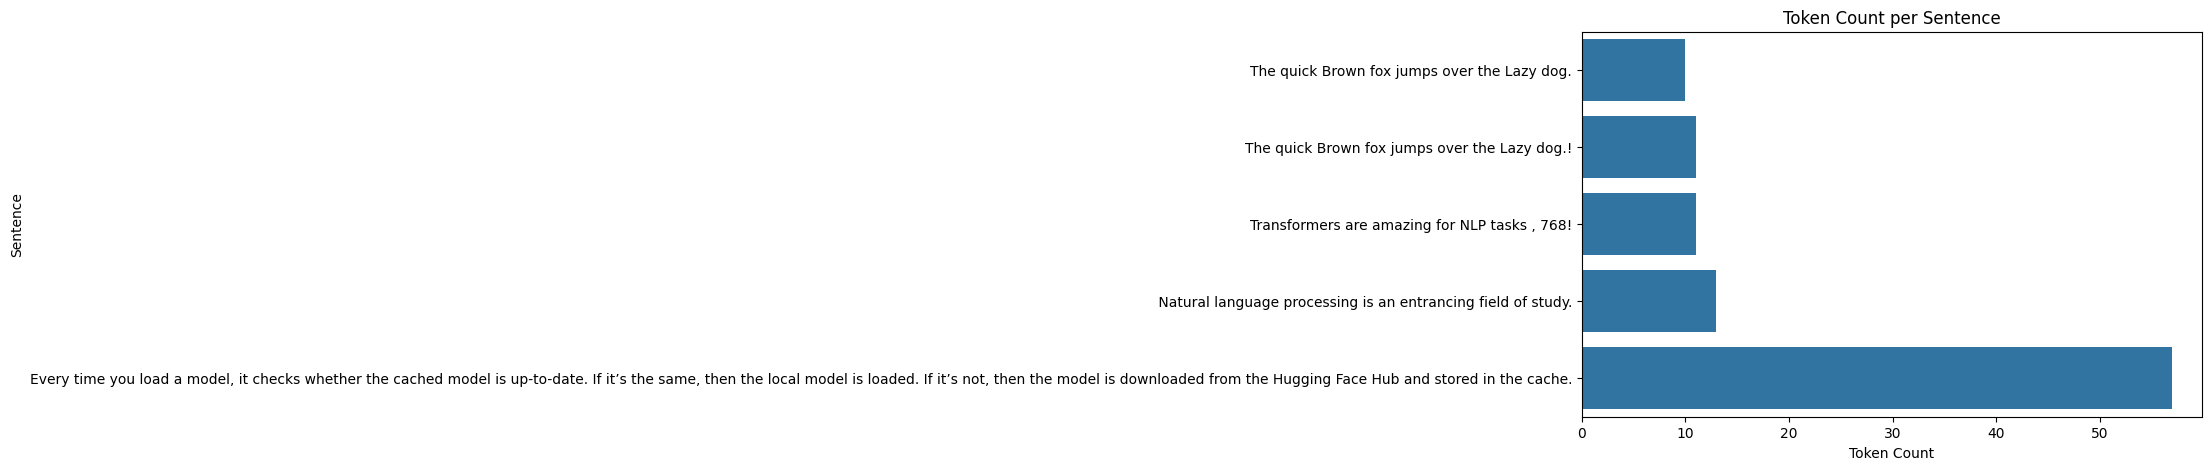

In [ ]:
# Visualize the token count for each sentence
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Token Count", y="Sentence")
plt.title("Token Count per Sentence")
plt.show()

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
#We convert rows into natural language because transformers are trained on text, not tables 

def row_to_natural_language(row):
    return f"On {row['day']} at {row['time']}, a {row['size']}-person party had a total bill of ${row['total_bill']:.2f} and tipped ${row['tip']:.2f}."     
tips["natural_language"] = tips.apply(row_to_natural_language, axis=1)


pd.set_option('display.max_colwidth', None)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,natural_language
0,16.99,1.01,Female,No,Sun,Dinner,2,"On Sun at Dinner, a 2-person party had a total bill of $16.99 and tipped $1.01."
1,10.34,1.66,Male,No,Sun,Dinner,3,"On Sun at Dinner, a 3-person party had a total bill of $10.34 and tipped $1.66."
2,21.01,3.50,Male,No,Sun,Dinner,3,"On Sun at Dinner, a 3-person party had a total bill of $21.01 and tipped $3.50."
3,23.68,3.31,Male,No,Sun,Dinner,2,"On Sun at Dinner, a 2-person party had a total bill of $23.68 and tipped $3.31."
4,24.59,3.61,Female,No,Sun,Dinner,4,"On Sun at Dinner, a 4-person party had a total bill of $24.59 and tipped $3.61."


BERT was pre-trained on texts, hence we convert table to natural language as it understands only sequence of tokens 
We can see that the grammatical structure is the same in all cases, everything is encoded as a 1-dimensional token sequence.

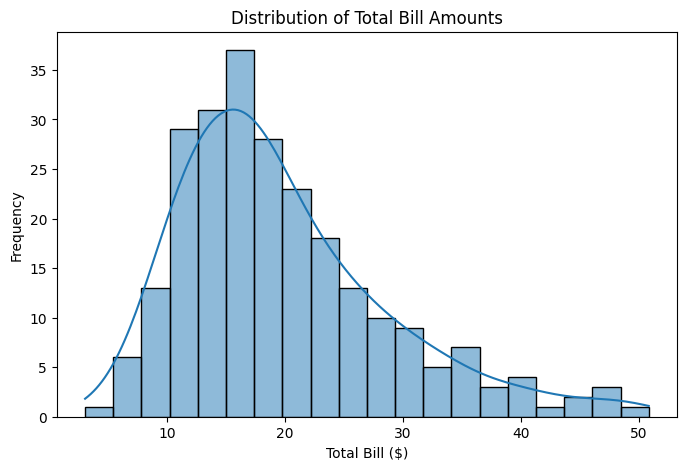

In [39]:
# Visualize the distribution of total bill amounts
plt.figure(figsize=(8,5))       
sns.histplot(tips["total_bill"], bins=20, kde=True)
plt.title("Distribution of Total Bill Amounts")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.show()


In [40]:
tips["Token Count"] = tips["natural_language"].apply(
    lambda x: len(tokenizer.tokenize(x))
)


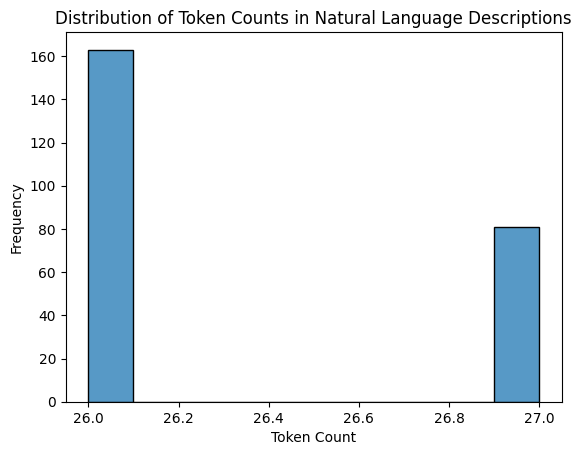

In [41]:
sns.histplot(tips["Token Count"], bins=10)
plt.title("Distribution of Token Counts in Natural Language Descriptions")
plt.xlabel("Token Count")       
plt.ylabel("Frequency")
plt.show()

The token count distribution is tightly clustered around 26–27 tokens because the sentence template is fixed and only numeric values vary, resulting in minimal variation in WordPiece tokenization.

Part 2 — Generating Language (GPT) - Decoder transformer only | left to right next token generation

model - GPT2 - Causal language model - Each token depends only on the tokens before it - Masked Self- attention mechanism - so it cannot look ahead

In [42]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2").to(device)

# GPT2 has no pad token by default
gpt_tokenizer.pad_token = gpt_tokenizer.eos_token


Loading weights: 100%|██████████| 148/148 [00:00<00:00, 623.18it/s, Materializing param=transformer.wte.weight]             
GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [43]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
#  Generate text using the GPT-2 model
# We can control the generation process using parameters like max_length, do_sample, temperature, and num_beams.

def generate_text(prompt, max_length=40, 
                  do_sample=False, 
                  temperature=1.0, 
                  num_beams=1):
    
    inputs = gpt_tokenizer(prompt, return_tensors="pt").to(device)
    
    output = gpt_model.generate(
        **inputs,
        max_length=max_length,
        do_sample=do_sample,
        temperature=temperature,
        num_beams=num_beams,
        early_stopping=True
    )
    
    return gpt_tokenizer.decode(output[0], skip_special_tokens=True)


In [49]:
prompts = ["The capital of France is"
"I opened the fridge and found"
"The number 1024 is important because"]

for p in prompts:
    print("Prompt:", p)
    print(generate_text(p, do_sample=False, num_beams=1))
    print("-" * 60)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The capital of France isI opened the fridge and foundThe number 1024 is important because
The capital of France isI opened the fridge and foundThe number 1024 is important because it is the number of people who have been killed in the last year. It is the number of people who have
------------------------------------------------------------
